# PH Food Prices (2000-2023)

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read the file and analyze its data

In [214]:
# Dataset from https://data.humdata.org/dataset/wfp-food-prices-for-philippines
food_prices = pd.read_csv('ph_food_prices.csv')
food_prices.head()

,date,region,city/province,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,Maize flour (yellow),KG,actual,Retail,PHP,15.00,0.3717
1,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Retail,PHP,20.00,0.4957
2,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (milled, superior)",KG,actual,Wholesale,PHP,18.35,0.4548
3,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Retail,PHP,18.00,0.4461
4,15/01/2000,National Capital region,Metropolitan Manila,Metro Manila,14.604167,120.982222,cereals and tubers,"Rice (regular, milled)",KG,actual,Wholesale,PHP,16.35,0.4052


In [215]:
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141765 entries, 0 to 141764
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           141765 non-null  object 
 1   region         141765 non-null  object 
 2   city/province  141765 non-null  object 
 3   market         141765 non-null  object 
 4   latitude       141765 non-null  float64
 5   longitude      141765 non-null  float64
 6   category       141765 non-null  object 
 7   commodity      141765 non-null  object 
 8   unit           141765 non-null  object 
 9   priceflag      141765 non-null  object 
 10  pricetype      141765 non-null  object 
 11  currency       141765 non-null  object 
 12  price          141765 non-null  float64
 13  usdprice       141765 non-null  float64
dtypes: float64(4), object(10)
memory usage: 15.1+ MB


In [216]:
food_prices.describe(include='all')

,date,region,city/province,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,141765,141765,141765,141765,141765.000000,141765.000000,141765,141765,141765,141765,141765,141765,141765.000000,141765.000000
unique,281,17,78,97,NaN,NaN,4,67,2,1,3,1,NaN,NaN
top,15/07/2020,Region III,Davao del Sur,Davao City,NaN,NaN,vegetables and fruits,"Rice (regular, milled)",KG,actual,Retail,PHP,NaN,NaN
freq,3906,12110,5967,4316,NaN,NaN,60870,6065,136845,141765,135111,141765,NaN,NaN
mean,NaN,NaN,NaN,NaN,11.671230,122.881505,NaN,NaN,NaN,NaN,NaN,NaN,116.467966,2.287652
std,NaN,NaN,NaN,NaN,3.616373,1.924088,NaN,NaN,NaN,NaN,NaN,NaN,109.621618,2.117082
min,NaN,NaN,NaN,NaN,5.029099,118.735278,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,0.034300
25%,NaN,NaN,NaN,NaN,8.477437,121.086142,NaN,NaN,NaN,NaN,NaN,NaN,40.710000,0.810200
50%,NaN,NaN,NaN,NaN,11.560250,122.755280,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,1.586300
75%,NaN,NaN,NaN,NaN,14.608900,124.716536,NaN,NaN,NaN,NaN,NaN,NaN,158.920000,3.166500


In [217]:
# Check if there is null data
food_prices.isnull().sum()

date             0
region           0
city/province    0
market           0
latitude         0
longitude        0
category         0
commodity        0
unit             0
priceflag        0
pricetype        0
currency         0
price            0
usdprice         0
dtype: int64

In [218]:
# Check if there is duplication of data
food_prices.duplicated().sum()

0

### Convert column into correct data type

In [267]:
# Convert date column into datetime
food_prices['date'] = pd.to_datetime(food_prices['date'], dayfirst=False)

### Augement data with additional columns

In [220]:
# Add Year and Month Column
food_prices['year'] = food_prices['date'].dt.year
food_prices['month'] = food_prices['date'].dt.month

### Drop the unnecessary column

In [221]:
food_prices = food_prices.drop(food_prices[['latitude','longitude','currency','priceflag']], axis=1)

In [222]:
# Rename the column price into price_php
food_prices.rename(columns={'price': 'price_php'}, inplace=True)

In [223]:
food_prices.head()

,date,region,city/province,market,category,commodity,unit,pricetype,price_php,usdprice,year,month
0,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,cereals and tubers,Maize flour (yellow),KG,Retail,15.00,0.3717,2000,1
1,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,cereals and tubers,"Rice (milled, superior)",KG,Retail,20.00,0.4957,2000,1
2,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,cereals and tubers,"Rice (milled, superior)",KG,Wholesale,18.35,0.4548,2000,1
3,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,cereals and tubers,"Rice (regular, milled)",KG,Retail,18.00,0.4461,2000,1
4,2000-01-15,National Capital region,Metropolitan Manila,Metro Manila,cereals and tubers,"Rice (regular, milled)",KG,Wholesale,16.35,0.4052,2000,1


### 1. What are the prices of foods based on their categories over the years?

In [224]:
# Extract the foods based on their category
food_cereals = food_prices[food_prices['category'] == 'cereals and tubers']
food_meats = food_prices[food_prices['category'] == 'meat, fish and eggs']
food_nuts = food_prices[food_prices['category'] == 'pulses and nuts']
food_veg = food_prices[food_prices['category'] == 'vegetables and fruits']

In [225]:
# Group it according to their years and get the average prices of it
food_cereals_grp = food_cereals.groupby('year').mean(numeric_only = True)
food_meats_grp = food_meats.groupby('year').mean(numeric_only = True)
food_nuts_grp = food_nuts.groupby('year').mean(numeric_only = True)
food_veg_grp = food_veg.groupby('year').mean(numeric_only = True)

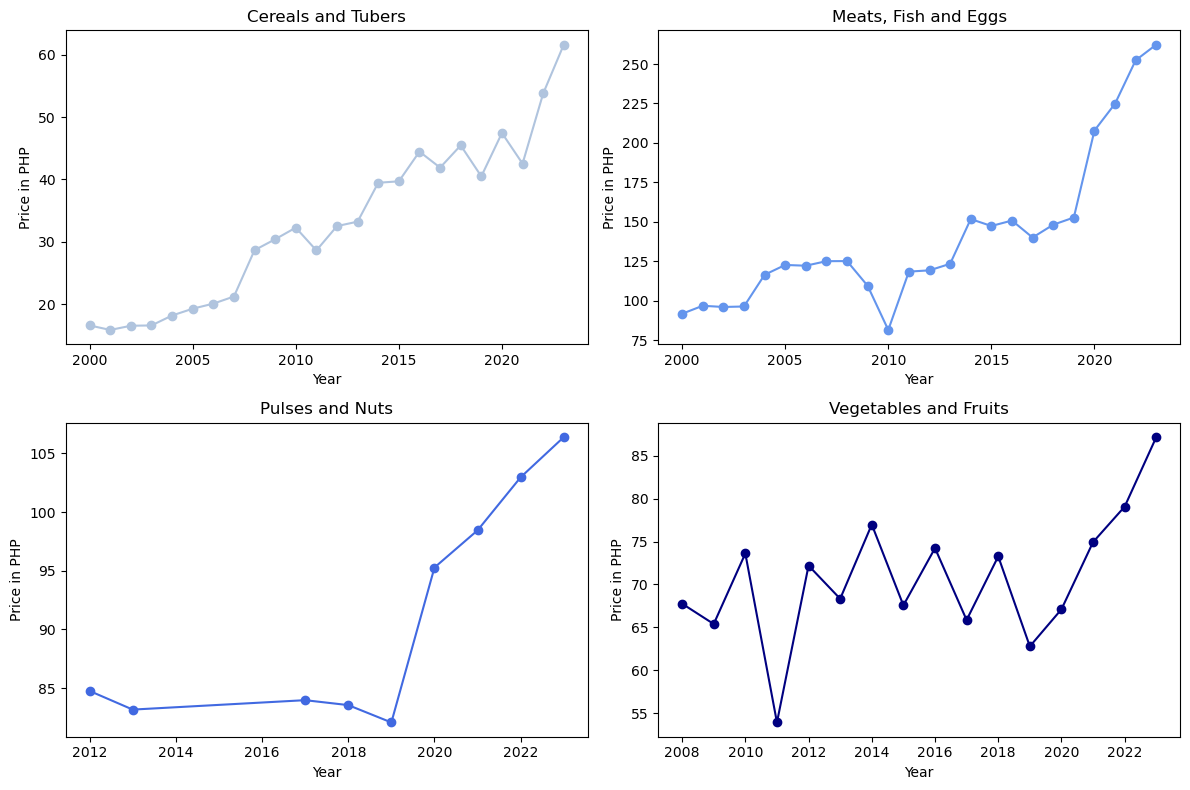

In [226]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
colors = ['lightsteelblue','cornflowerblue','royalblue','navy']
# Plot each group on separate subplots
axs[0, 0].plot(food_cereals_grp.index, food_cereals_grp['price_php'], marker='o', color=colors[0])
axs[0, 0].set_title('Cereals and Tubers')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Price in PHP')

axs[0, 1].plot(food_meats_grp.index, food_meats_grp['price_php'], marker='o', color=colors[1])
axs[0, 1].set_title('Meats, Fish and Eggs')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Price in PHP')

axs[1, 0].plot(food_nuts_grp.index, food_nuts_grp['price_php'], marker='o', color=colors[2])
axs[1, 0].set_title('Pulses and Nuts')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Price in PHP')

axs[1, 1].plot(food_veg_grp.index, food_veg_grp['price_php'], marker='o', color=colors[3])
axs[1, 1].set_title('Vegetables and Fruits')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Price in PHP')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### 2.  What are the average prices of different foods based on cereal and tuber commodities?

In [227]:
# Check its value in tabular format
food_cereals_commodity = food_cereals.groupby('commodity').mean(numeric_only = True)
food_cereals_commodity

,price_php,usdprice,year,month
commodity,,,,
Maize (white),17.602381,0.365075,2012.584127,6.701587
Maize (yellow),23.310014,0.455083,2017.526093,6.516220
Maize flour (white),22.502729,0.476735,2009.375267,6.445629
Maize flour (yellow),20.912271,0.441249,2009.353712,6.448326
Potatoes (Irish),82.216344,1.621449,2017.794979,6.409780
"Rice (milled, superior)",30.554382,0.644484,2009.447018,6.457544
Rice (paddy),14.577440,0.328681,2009.855422,6.362952
Rice (premium),45.453482,0.926445,2020.000000,8.473461
"Rice (regular, milled)",34.111007,0.683148,2016.154658,6.483924


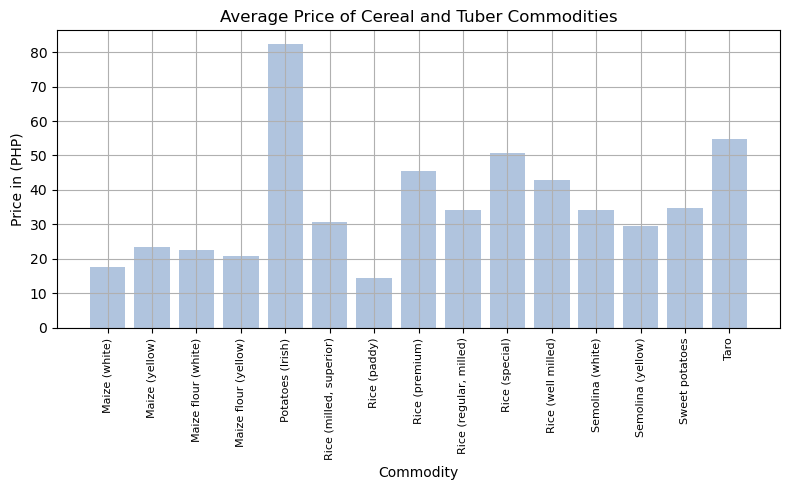

In [228]:
# Values
cereals_group = food_cereals.groupby('commodity')
average_prices = cereals_group['price_php'].mean()  

# Plotting
plt.figure(figsize=(8, 5)) 
plt.bar(average_prices.index, average_prices.values, color= colors[0])
plt.xticks(rotation='vertical', size=8)
plt.title('Average Price of Cereal and Tuber Commodities')
plt.xlabel('Commodity')
plt.ylabel('Price in (PHP)')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 3.  What are the average prices of different foods based on meat, fish and eggs commodities?

In [229]:
# Check its value in tabular format
food_meats_commodity = food_meats.groupby('commodity').mean(numeric_only = True)
food_meats_commodity

,price_php,usdprice,year,month
commodity,,,,
Anchovies,143.070315,2.760217,2021.483254,6.418262
Chicken,130.802500,2.669101,2020.000000,8.588235
Crab,318.336297,6.172280,2021.381669,6.518924
Eggs,6.588257,0.131344,2018.529018,6.434440
Eggs (duck),8.895130,0.174999,2021.211460,6.654843
Fish (fresh),117.450311,2.485786,2014.060656,6.316393
Fish (frigate tuna),161.713752,3.219353,2020.517241,7.772414
"Fish (mackerel, fresh)",199.179325,3.916124,2020.708589,7.616564
Fish (milkfish),189.262851,3.645045,2021.473290,6.450493


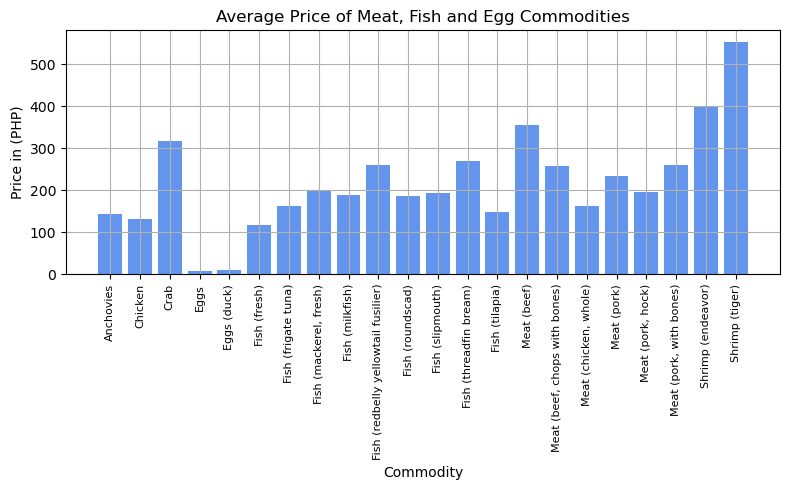

In [230]:
# Values
meats_group = food_meats.groupby('commodity')
average_prices = meats_group['price_php'].mean()  

# Plotting
plt.figure(figsize=(8, 5)) 
plt.bar(average_prices.index, average_prices.values, color= colors[1])
plt.xticks(rotation='vertical', size=8)
plt.title('Average Price of Meat, Fish and Egg Commodities')
plt.xlabel('Commodity')
plt.ylabel('Price in (PHP)')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 4.  What are the average prices of different foods based on pulse and nut commodities?

In [231]:
# Check its value in tabular format
food_nuts_commodity = food_nuts.groupby('commodity').mean(numeric_only = True)
food_nuts_commodity

,price_php,usdprice,year,month
commodity,,,,
Beans (mung),95.892711,1.882528,2020.310321,6.573266
Groundnuts (shelled),105.656252,2.055130,2021.303342,6.655013
Groundnuts (unshelled),85.606886,1.756495,2019.329829,6.725361


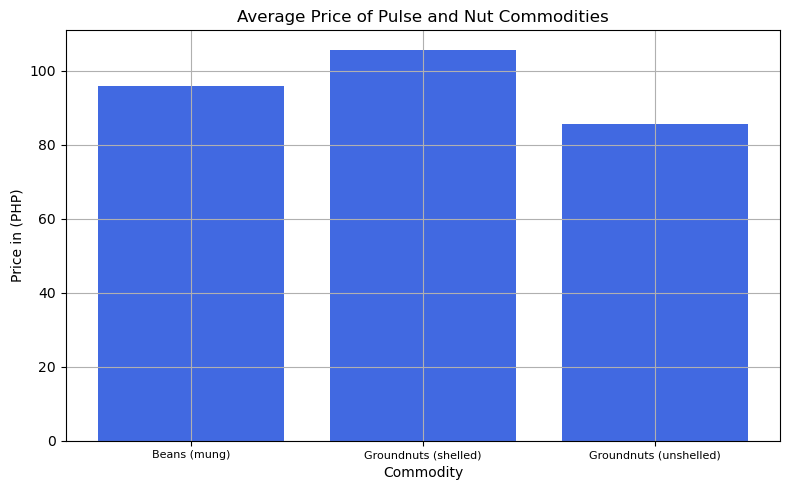

In [232]:
# Values
nuts_group = food_nuts.groupby('commodity')
average_prices = nuts_group['price_php'].mean()  

# Plotting
plt.figure(figsize=(8, 5)) 
plt.bar(average_prices.index, average_prices.values, color= colors[2])
plt.xticks(size=8)
plt.title('Average Price of Pulse and Nut Commodities')
plt.xlabel('Commodity')
plt.ylabel('Price in (PHP)')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 5.  What are the average prices of different foods based on vegetable and fruit commodities?

In [233]:
# Check its value in tabular format
food_veg_commodity = food_veg.groupby('commodity').mean(numeric_only = True)
food_veg_commodity

,price_php,usdprice,year,month
commodity,,,,
Bananas (lakatan),67.554881,1.307257,2021.450020,6.512343
Bananas (latundan),45.934332,0.891649,2021.352273,6.648674
Bananas (saba),36.200947,0.710288,2021.015909,7.120455
"Beans (green, fresh)",90.223809,1.759541,2021.164058,6.860290
Beans (string),65.528576,1.273776,2021.233986,6.773425
Bitter melon,88.812625,1.713834,2021.453802,6.467780
Bottle gourd,35.528016,0.701354,2021.061053,6.882632
Cabbage,66.813808,1.328457,2018.378677,6.432714
Cabbage (chinese),74.526775,1.453204,2021.124661,6.963415


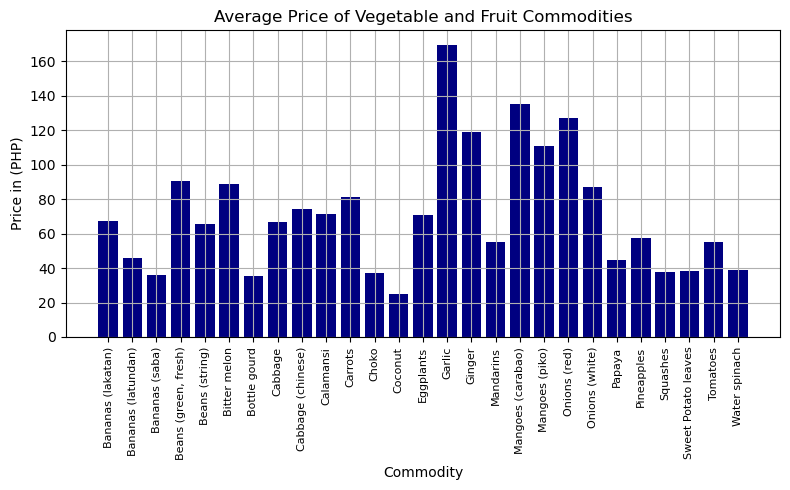

In [234]:
# Values
veg_group = food_veg.groupby('commodity')
average_prices = veg_group['price_php'].mean()  

# Plotting
plt.figure(figsize=(8, 5)) 
plt.bar(average_prices.index, average_prices.values, color= colors[3])
plt.xticks(rotation='vertical', size=8)
plt.title('Average Price of Vegetable and Fruit Commodities')
plt.xlabel('Commodity')
plt.ylabel('Price in (PHP)')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 6. What are the prices of  Rice (milled,superior) and Rice(milled, regular) over the available years?

In [235]:
# Extract the Rice (milled, superior) from the dataset
rice_superior = food_prices[food_prices['commodity'] == 'Rice (milled, superior)']
rice_superior = rice_superior.groupby('year').mean(numeric_only = True)
rice_superior

,price_php,usdprice,month
year,,,
2000,18.746528,0.425686,6.500000
2001,18.475000,0.362428,6.500000
2002,19.415070,0.376337,6.549296
2003,19.443403,0.359081,6.500000
2004,20.315211,0.363980,6.563380
2005,21.979306,0.400479,6.500000
2006,22.475625,0.439017,6.500000
2007,23.843542,0.518858,6.500000
2008,31.388056,0.708152,6.500000


In [236]:
# Extract the Rice (regular, milled) from the dataset
rice_regular = food_prices[food_prices['commodity'] == 'Rice (regular, milled)']
rice_regular = rice_regular.groupby('year').mean(numeric_only = True)
rice_regular

,price_php,usdprice,month
year,,,
2000,17.152869,0.388108,6.680328
2001,16.551230,0.324330,6.696721
2002,17.312353,0.335582,6.655462
2003,17.283984,0.319020,6.650407
2004,18.438049,0.330301,6.634146
2005,20.309024,0.369985,6.674797
2006,20.657280,0.403727,6.640000
2007,22.212742,0.484293,6.661290
2008,28.654956,0.646273,6.654867


In [237]:
# Extract the Rice (special) from the dataset
rice_paddy = food_prices[food_prices['commodity'] == 'Rice (paddy)']
rice_paddy = rice_paddy.groupby('year').mean(numeric_only = True)
rice_paddy

,price_php,usdprice,month
year,,,
2008,13.714146,0.310783,6.548780
2009,14.262883,0.300466,6.582822
2010,14.516981,0.322806,6.559748
2012,15.814101,0.375481,6.870504
2013,15.361282,0.379018,2.051282


In [238]:
# Extract the Rice (special) from the dataset
rice_special = food_prices[food_prices['commodity'] == 'Rice (special)']
rice_special = rice_special.groupby('year').mean(numeric_only = True)
rice_special

,price_php,usdprice,month
year,,,
2020,50.889495,1.037444,8.515152
2021,49.886670,1.014688,6.510989
2022,50.918259,0.937073,6.500000
2023,52.048662,0.941171,4.000000


In [239]:
# Extract the Rice (well milled) from the dataset
rice_wmilled = food_prices[food_prices['commodity'] == 'Rice (well milled)']
rice_wmilled = rice_wmilled.groupby('year').mean(numeric_only = True)
rice_wmilled

,price_php,usdprice,month
year,,,
2020,42.109800,0.858351,8.489149
2021,42.063011,0.855511,6.510989
2022,43.086183,0.792922,6.500000
2023,44.016684,0.795924,4.000000


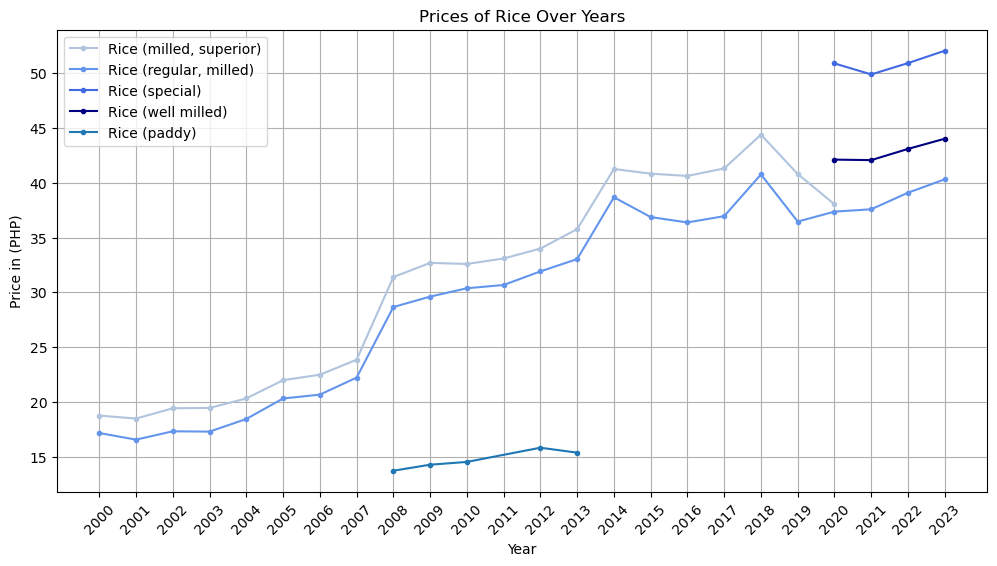

In [240]:
# X value from 2000 - 2023
years = range(2000,2024)

# Create and Display the plot lin line chart
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(rice_superior.index, rice_superior['price_php'], label='Rice (milled, superior)',marker='.',color = colors[0])
ax.plot(rice_regular.index, rice_regular['price_php'], label='Rice (regular, milled)',marker='.',color = colors[1])
ax.plot(rice_special.index, rice_special['price_php'], label='Rice (special)', marker='.',color = colors[2])
ax.plot(rice_wmilled.index, rice_wmilled['price_php'], label='Rice (well milled)',marker='.',color = colors[3])
ax.plot(rice_paddy.index, rice_paddy['price_php'], label='Rice (paddy)',marker='.')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price in (PHP)')
ax.set_title('Prices of Rice Over Years')
plt.xticks(years, rotation=45) 

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()

### 7. What are the prices of Meat(beef), Meat(pork), Meat(chicken, whole) over the years?

In [241]:
# Extract the Meat (beef, chops with bones)from the dataset
beef = food_prices[food_prices['commodity'] == 'Meat (beef, chops with bones)']
beef = beef.groupby('year').mean(numeric_only = True)
beef

,price_php,usdprice,month
year,,,
2008,182.587500,4.131308,6.500000
2009,166.799531,3.514164,6.500000
2010,202.575833,4.505183,6.500000
2011,179.705260,4.147907,6.500000
2012,181.058087,4.280183,5.934426
2013,181.822805,4.418485,3.329268
2014,186.031111,4.224127,9.765432
2015,186.914857,4.128223,6.068571
2016,192.299737,4.070317,6.521053


In [242]:
# Extract the Meat (pork) from the dataset
pork = food_prices[food_prices['commodity'] == 'Meat (pork)']
pork = beef.groupby('year').mean(numeric_only = True)
pork

,price_php,usdprice,month
year,,,
2008,182.587500,4.131308,6.500000
2009,166.799531,3.514164,6.500000
2010,202.575833,4.505183,6.500000
2011,179.705260,4.147907,6.500000
2012,181.058087,4.280183,5.934426
2013,181.822805,4.418485,3.329268
2014,186.031111,4.224127,9.765432
2015,186.914857,4.128223,6.068571
2016,192.299737,4.070317,6.521053


In [243]:
# Extract the Meat (chicken, whole) from the dataset
chicken = food_prices[food_prices['commodity'] == 'Meat (chicken, whole)']
chicken = chicken.groupby('year').mean(numeric_only = True)
chicken

,price_php,usdprice,month
year,,,
2008,117.743333,2.664225,6.500000
2009,128.041615,2.698476,6.500000
2010,128.275276,2.851928,6.607362
2011,128.417917,2.964054,6.500000
2012,128.355568,3.034390,5.945946
2013,131.351235,3.186914,3.456790
2014,140.588765,3.192156,9.765432
2015,138.006492,3.039098,6.481675
2016,140.535579,2.974685,6.521053


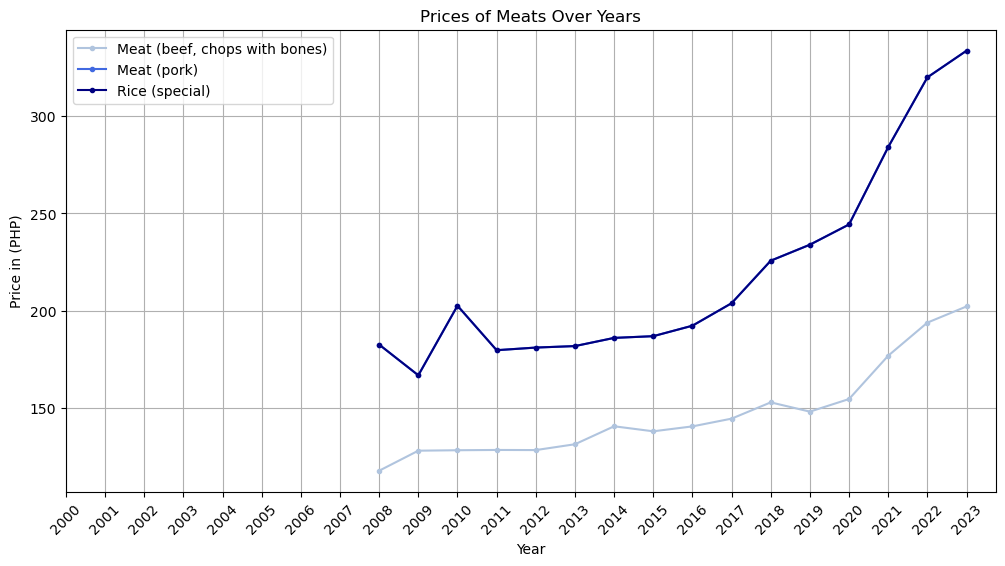

In [244]:
# X value from 2000 - 2023
years = range(2000,2024)

# Create and Display the plot lin line chart
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(chicken.index, chicken['price_php'], label= 'Meat (beef, chops with bones)',marker='.',color = colors[0])
ax.plot(beef.index, beef['price_php'], label= 'Meat (pork)',marker='.',color = colors[2])
ax.plot(pork.index, pork['price_php'], label='Rice (special)', marker='.',color = colors[3])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price in (PHP)')
ax.set_title('Prices of Meats Over Years')
plt.xticks(years, rotation=45) 

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()

### 8. What are the prices of Beans (mung), Groundnuts (shelled), and Groundnuts (unshelled) over the years?

In [245]:
# Extract the Beans (mung) from the dataset
mung = food_prices[food_prices['commodity'] == 'Beans (mung)']
mung = mung.groupby('year').mean(numeric_only = True)
mung

,price_php,usdprice,month
year,,,
2012,76.064153,1.818100,8.457627
2013,72.879667,1.790422,2.500000
2017,83.968346,1.660407,8.526316
2018,83.548090,1.587099,6.472362
2019,82.069643,1.572851,3.023810
2020,94.301675,1.922791,8.487562
2021,99.496284,2.023396,6.500000
2022,102.471574,1.886036,6.500000
2023,103.783413,1.876724,4.000000


In [246]:
# Extract the Groundnuts (shelled) from the dataset
shelled = food_prices[food_prices['commodity'] == 'Groundnuts (shelled)']
shelled = shelled.groupby('year').mean(numeric_only = True)
shelled

,price_php,usdprice,month
year,,,
2020,103.445852,2.109492,8.496212
2021,101.608100,2.066870,6.500000
2022,107.912287,1.984959,6.500000
2023,113.735548,2.056660,4.000000


In [247]:
# Extract the Groundnuts (unshelled) from the dataset
unshelled = food_prices[food_prices['commodity'] == 'Groundnuts (unshelled)']
unshelled = unshelled.groupby('year').mean(numeric_only = True)
unshelled

,price_php,usdprice,month
year,,,
2012,94.336636,2.254625,8.364486
2013,94.810377,2.328892,2.528302
2020,78.466622,1.597845,8.346847
2021,78.213636,1.590662,6.500000
2022,88.659423,1.631251,6.500000
2023,92.892418,1.679697,4.000000


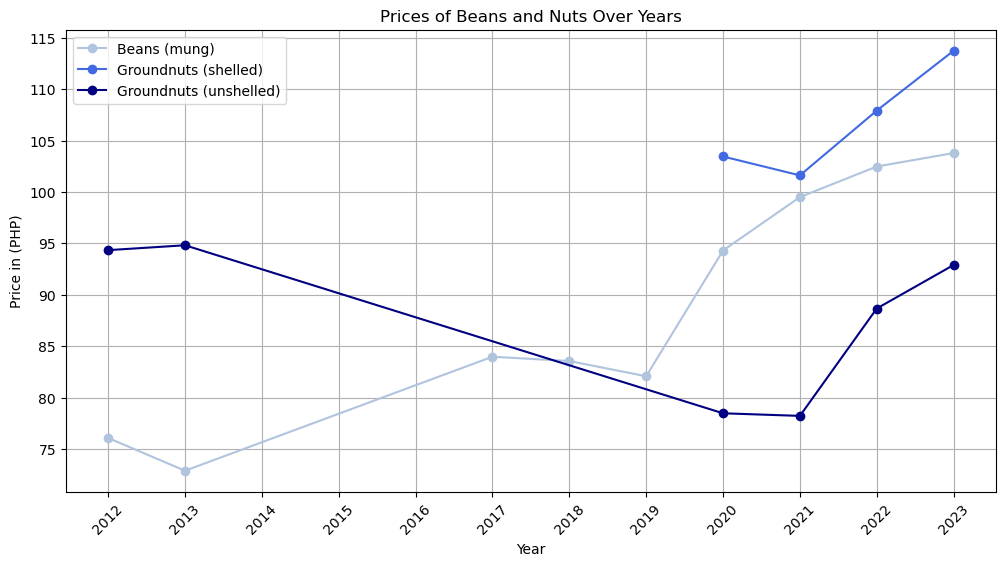

In [248]:
# X value from 2012 - 2023
years = range(2012,2024)

# Create and Display the plot lin line chart
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(mung.index, mung['price_php'], label= 'Beans (mung)',marker='o',color = colors[0])
ax.plot(shelled.index, shelled['price_php'], label= 'Groundnuts (shelled)',marker='o',color = colors[2])
ax.plot(unshelled.index, unshelled['price_php'], label='Groundnuts (unshelled)', marker='o',color = colors[3])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price in (PHP)')
ax.set_title('Prices of Beans and Nuts Over Years')
plt.xticks(years, rotation=45) 

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()

### 9. What are the prices of Onions (red) and Onions (white) over the years?

In [249]:
# Extract the Onions (red) from the dataset
red = food_prices[food_prices['commodity'] == 'Onions (red)']
red = red.groupby('year').mean(numeric_only = True)
red

,price_php,usdprice,month
year,,,
2008,82.767839,1.871806,6.608040
2009,67.103529,1.415738,6.500000
2010,58.789902,1.306737,6.500000
2012,82.263114,1.948488,6.161677
2013,71.406190,1.735879,3.357143
2014,65.050000,1.476048,9.835443
2015,69.633403,1.526684,6.481675
2016,97.526684,2.064194,6.521053
2017,81.257000,1.612912,6.580000


In [250]:
# Extract the Onions (white) from the dataset
white = food_prices[food_prices['commodity'] == 'Onions (white)']
white = white.groupby('year').mean(numeric_only = True)
white

,price_php,usdprice,month
year,,,
2008,69.424534,1.569771,6.503106
2009,62.652532,1.321978,6.664557
2010,56.782788,1.265775,6.581818
2012,70.799448,1.675895,6.006897
2013,66.500270,1.615334,3.351351
2014,73.814833,1.676572,9.566667
2015,67.112632,1.473055,6.548872
2016,82.689462,1.751570,6.530769
2017,75.627986,1.499781,6.597122


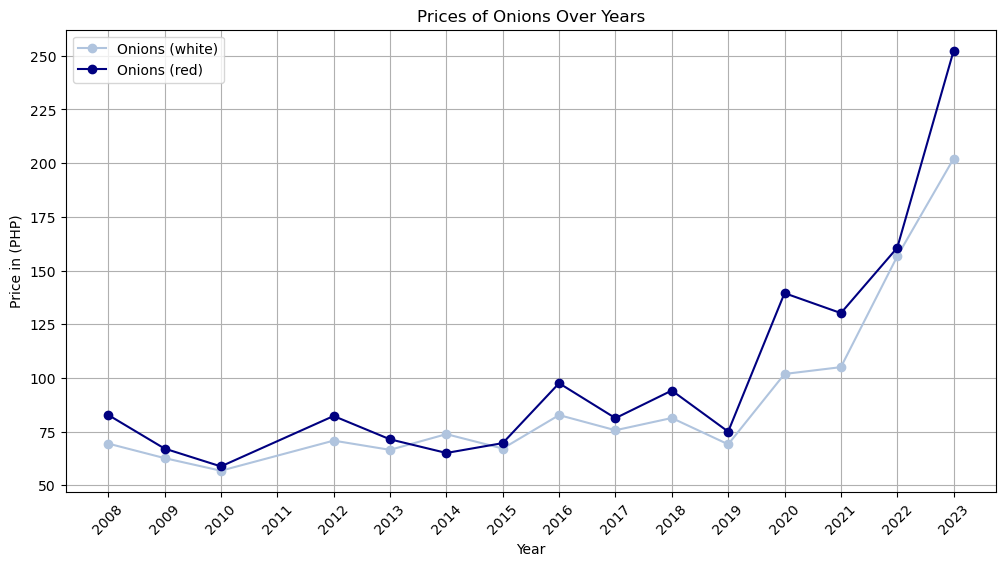

In [251]:
# X value from 2008 - 2023
years = range(2008,2024)

# Create and Display the plot lin line chart
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(white.index, white['price_php'], label= 'Onions (white)',marker='o',color = colors[0])
ax.plot(red.index, red['price_php'], label= 'Onions (red)',marker='o',color = colors[3])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price in (PHP)')
ax.set_title('Prices of Onions Over Years')
plt.xticks(years, rotation=45) 

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()

### 10. What are the average price of cereals and tubers per region?

In [252]:
# Extract the foods based on their category
food_cereals = food_prices[food_prices['category'] == 'cereals and tubers']
food_meats = food_prices[food_prices['category'] == 'meat, fish and eggs']
food_nuts = food_prices[food_prices['category'] == 'pulses and nuts']
food_veg = food_prices[food_prices['category'] == 'vegetables and fruits']

In [253]:
# Group by Region
reg_cereals = food_cereals.groupby('region').mean(numeric_only = True)
reg_cereals

,price_php,usdprice,year,month
region,,,,
Autonomous region in Muslim Mindanao,52.142586,1.030300,2018.975732,6.499582
Cordillera Administrative region,47.764341,0.940433,2019.896739,6.519701
National Capital region,33.078471,0.684074,2011.175381,6.426208
Region I,44.431037,0.880022,2018.863372,6.650194
Region II,38.414020,0.758985,2019.290958,6.544315
Region III,43.782958,0.872051,2017.108964,6.597424
Region IV-A,49.672782,0.983454,2019.652439,6.637195
Region IV-B,50.533045,0.994282,2019.539267,6.666667
Region IX,42.296324,0.835698,2017.796157,6.521303


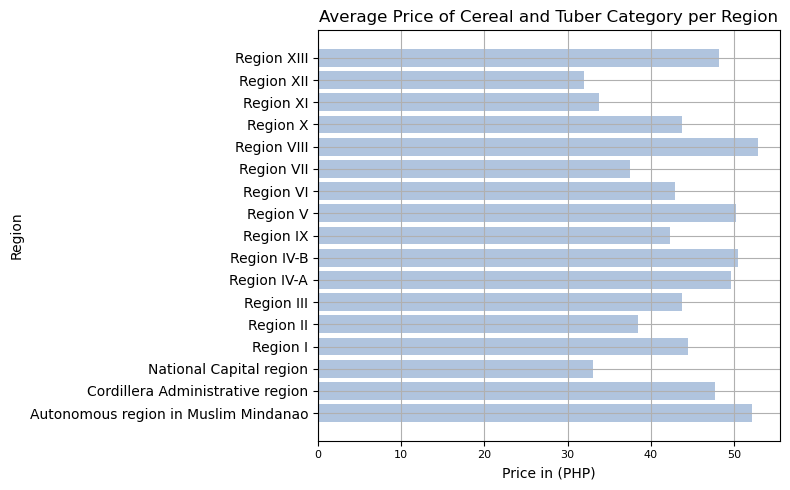

In [254]:
# Plotting
plt.figure(figsize=(8, 5)) 
plt.barh(reg_cereals.index, reg_cereals['price_php'], color= colors[0])
plt.xticks(size=8)
plt.title('Average Price of Cereal and Tuber Category per Region')
plt.xlabel('Price in (PHP)')
plt.ylabel('Region')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

In [255]:
food_prices['category'].unique()

array(['cereals and tubers', 'meat, fish and eggs',
       'vegetables and fruits', 'pulses and nuts'], dtype=object)

### 11. What are the average price of meat, fish and eggs per region?

In [256]:
# Group by Region
reg_meats = food_meats.groupby('region').mean(numeric_only = True)
reg_meats

,price_php,usdprice,year,month
region,,,,
Autonomous region in Muslim Mindanao,165.968492,3.292692,2019.686805,6.632189
Cordillera Administrative region,219.801779,4.314243,2020.086177,6.563943
National Capital region,223.438706,4.410858,2016.643617,6.354610
Region I,210.335606,4.130096,2019.770362,6.567739
Region II,215.990342,4.240193,2019.827483,6.476884
Region III,241.496093,4.700136,2020.118820,6.516479
Region IV-A,249.102604,4.874288,2020.111526,6.600000
Region IV-B,213.209391,4.168453,2020.253727,6.534161
Region IX,199.896201,3.892709,2019.857804,6.517459


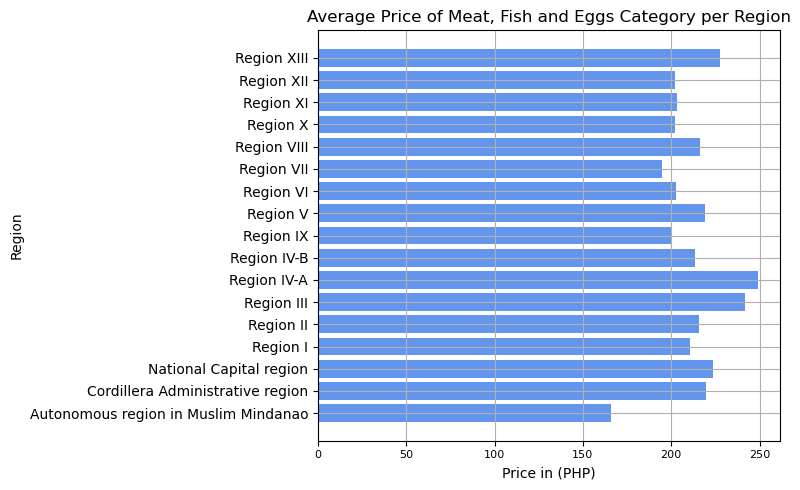

In [257]:
# Plotting
plt.figure(figsize=(8, 5)) 
plt.barh(reg_meats.index, reg_meats['price_php'], color= colors[1])
plt.xticks(size=8)
plt.title('Average Price of Meat, Fish and Eggs Category per Region')
plt.xlabel('Price in (PHP)')
plt.ylabel('Region')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 12. What are the average price of pulses and nuts per region?

In [258]:
# Group by Region
reg_nuts = food_nuts.groupby('region').mean(numeric_only = True)
reg_nuts

,price_php,usdprice,year,month
region,,,,
Autonomous region in Muslim Mindanao,94.111208,1.824522,2020.771812,6.557047
Cordillera Administrative region,121.336272,2.410127,2020.346154,6.713018
National Capital region,96.374444,1.933576,2019.088889,6.585185
Region I,92.277158,1.830992,2020.246575,6.633562
Region II,86.974496,1.712061,2020.596730,6.482289
Region III,99.008195,1.938123,2020.943205,6.651116
Region IV-A,89.877202,1.798361,2019.697248,6.894495
Region IV-B,101.619321,1.974994,2021.000000,6.501171
Region IX,90.886507,1.783762,2020.514706,6.761029


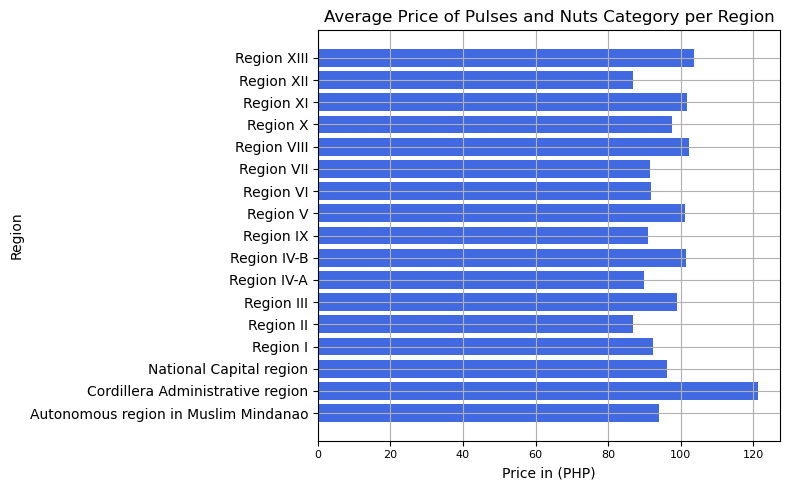

In [259]:
# Plotting
plt.figure(figsize=(8, 5)) 
plt.barh(reg_nuts.index, reg_nuts['price_php'], color= colors[2])
plt.xticks(size=8)
plt.title('Average Price of Pulses and Nuts Category per Region')
plt.xlabel('Price in (PHP)')
plt.ylabel('Region')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 13. What are the average price of vegetables and fruits per region?

In [260]:
# Group by Region
reg_veg = food_veg.groupby('region').mean(numeric_only = True)
reg_veg

,price_php,usdprice,year,month
region,,,,
Autonomous region in Muslim Mindanao,70.741863,1.390529,2019.845730,6.661846
Cordillera Administrative region,76.795134,1.517722,2020.146930,6.648246
National Capital region,87.531794,1.739244,2017.904973,6.373002
Region I,70.414719,1.393061,2019.706256,6.658304
Region II,64.591358,1.288261,2019.608331,6.642213
Region III,75.564632,1.474074,2020.495916,6.649164
Region IV-A,81.430604,1.615207,2019.828786,6.721882
Region IV-B,85.484509,1.692565,2020.064854,6.720193
Region IX,65.232967,1.275358,2019.991204,6.527740


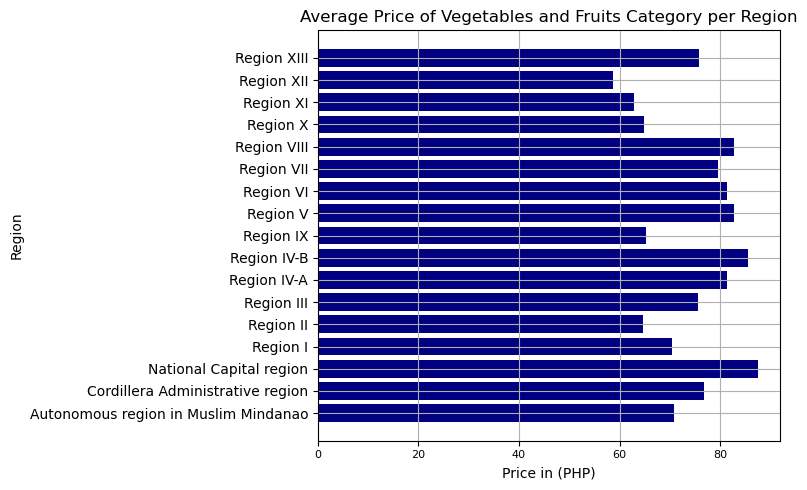

In [261]:
# Plotting
plt.figure(figsize=(8, 5)) 
plt.barh(reg_veg.index, reg_veg['price_php'], color= colors[3])
plt.xticks(size=8)
plt.title('Average Price of Vegetables and Fruits Category per Region')
plt.xlabel('Price in (PHP)')
plt.ylabel('Region')
plt.grid(True)

# Adjust the layout
plt.tight_layout() 

# Display the plot
plt.show()

### 14. What are the average price of cereals and tubers in Region IV-A and Region IV-B over the years?

In [262]:
food_prices['region'].unique()

array(['National Capital region', 'Region III', 'Region IX', 'Region VI',
       'Region VII', 'Region XI', 'Region XII',
       'Autonomous region in Muslim Mindanao',
       'Cordillera Administrative region', 'Region I', 'Region II',
       'Region IV-A', 'Region IV-B', 'Region V', 'Region VIII',
       'Region X', 'Region XIII'], dtype=object)

In [263]:
# Select the date wherein category is equals to cereals and region is equals to reg IV-A
four_a_cereals = food_prices[(food_prices['category'] == 'cereals and tubers') & 
                          (food_prices['region'] == 'Region IV-A')]

# Select the date wherein category is equals to cereals and region is equals to reg IV-B
four_b_cereals = food_prices[(food_prices['category'] == 'cereals and tubers') & 
                          (food_prices['region'] == 'Region IV-B')]

In [264]:
four_a_cereals = four_a_cereals.groupby('year').mean(numeric_only = True)
four_a_cereals

,price_php,usdprice,month
year,,,
2008,27.812500,0.627597,6.500000
2009,30.314412,0.638200,6.205882
2010,36.423333,0.809633,6.500000
2012,34.638387,0.821187,6.387097
2013,38.268462,0.929577,3.076923
2014,46.918000,1.064620,9.800000
2015,44.301250,0.973000,6.500000
2016,56.212500,1.185646,6.500000
2017,52.528750,1.042817,6.500000


In [265]:
four_b_cereals = four_b_cereals.groupby('year').mean(numeric_only = True)
four_b_cereals

,price_php,usdprice,month
year,,,
2008,29.109444,0.655825,6.500000
2009,27.146667,0.577185,7.000000
2010,41.194167,0.915471,6.500000
2012,36.071290,0.855239,6.387097
2013,38.886923,0.944154,3.076923
2014,54.575000,1.238810,9.800000
2015,50.202500,1.103888,6.500000
2016,63.353750,1.339850,6.500000
2017,53.595417,1.064225,6.500000


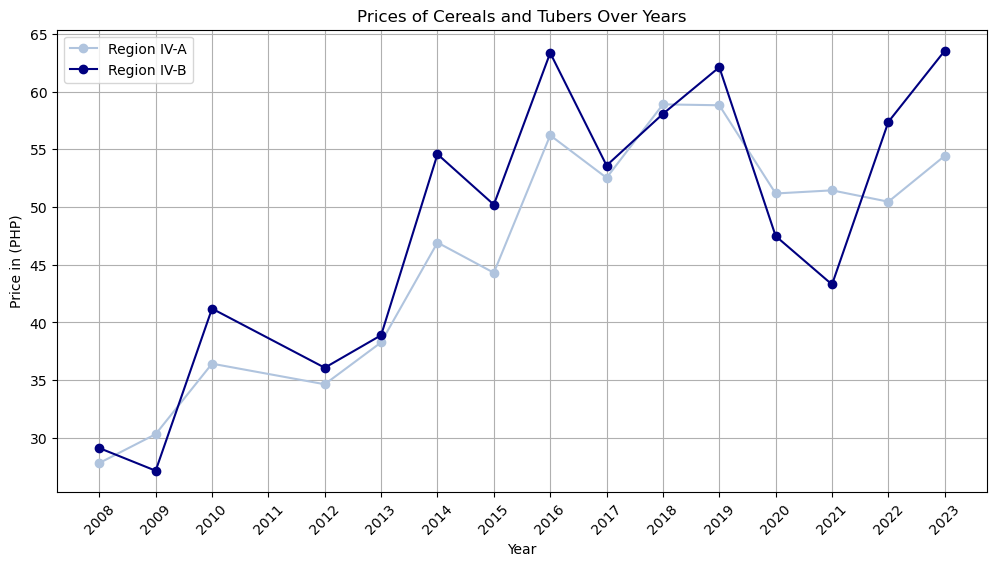

In [266]:
# X value from 2009-2023
years = range(2008,2024)

# Create and Display the plot lin line chart
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(four_a_cereals.index, four_a_cereals['price_php'], label= 'Region IV-A',marker='o',color = colors[0])
ax.plot(four_b_cereals.index, four_b_cereals['price_php'], label= 'Region IV-B',marker='o',color = colors[3])

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Price in (PHP)')
ax.set_title('Prices of Cereals and Tubers Over Years')
plt.xticks(years, rotation=45) 

# Add a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.show()